<H1><font color='blue'>$~~~~~~~~~~~$Network Theory Assignment-1</H1>
<H2><font color='blue'>$~~~~~~~~~~~$Submitted by- Kaushal Jadhav<br>$~~~~~~~~~~~$Roll No-20EC30019</H2>



In [112]:
# import required libraries
# numpy is used for performing mathematical operations 
# matplotlib is the plotting library for python. It is similar to MATLAB with respect to plotting commands
import numpy as np
from matplotlib import pyplot as plt
import cmath      # The complex numbers math library (or cmath) is used to generate the complex number symbol j
# A command to be written for Jupyter notebooks
%matplotlib inline   
# integrate module used for numeric integration
from scipy import integrate as integral
plt.rcParams['figure.figsize']=[8,8]   # To make all images of 8X8 size
plt.rcParams['lines.linewidth']=1      #  To make all plots uniform
j=complex(0,1)

<Font color='blue'>Sawtooth waveform is generated. The Sawtooth waveform is given by-<br>x(t)=2*t/T $~~~~~$for -T/2<=t<=T/2 <br>
x(t)=0 $~~~~~~~~~~~$for t=T/2 and t=-T/2<br>
x(t)=x(t+nT) $~$ for all n belonging to integers

In [ ]:
def create_signal(x,T,a=1):
  y=np.copy(x)
  temp=np.round(y/T)
  y=y-T*temp
  y*=2/T
  y[np.where(y==T/2)]=0
  y*=a
  return y 

Text(0, 0.5, 'Output (x(t)')

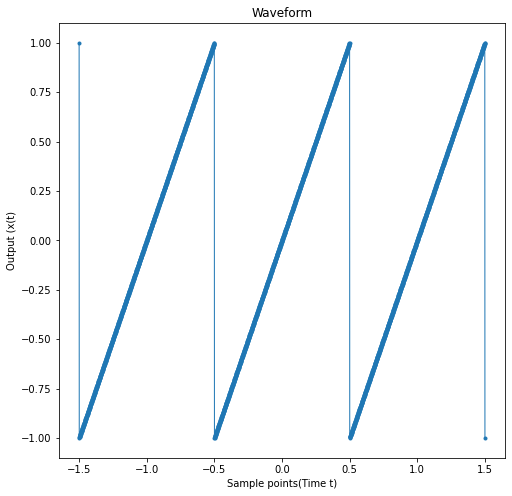

In [ ]:
# 1000 points between -T/2 and +T/2 and such 3 intervals are considered.
#np.linspace function arranges points in regular intervals
x = np.linspace(-3/2,3/2,3000)
y=create_signal(x,1)
fig,ax=plt.subplots()
ax.plot(x,y,marker='.')
ax.set_title("Waveform")
ax.set_xlabel("Sample points(Time t)")
ax.set_ylabel("Output (x(t)")

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Fig.1- Plot of original waveform

<H1><font color='blue'>$~~~~~~~~~~~$Q1 Part a- Computing Fourier series coefficients</H1>

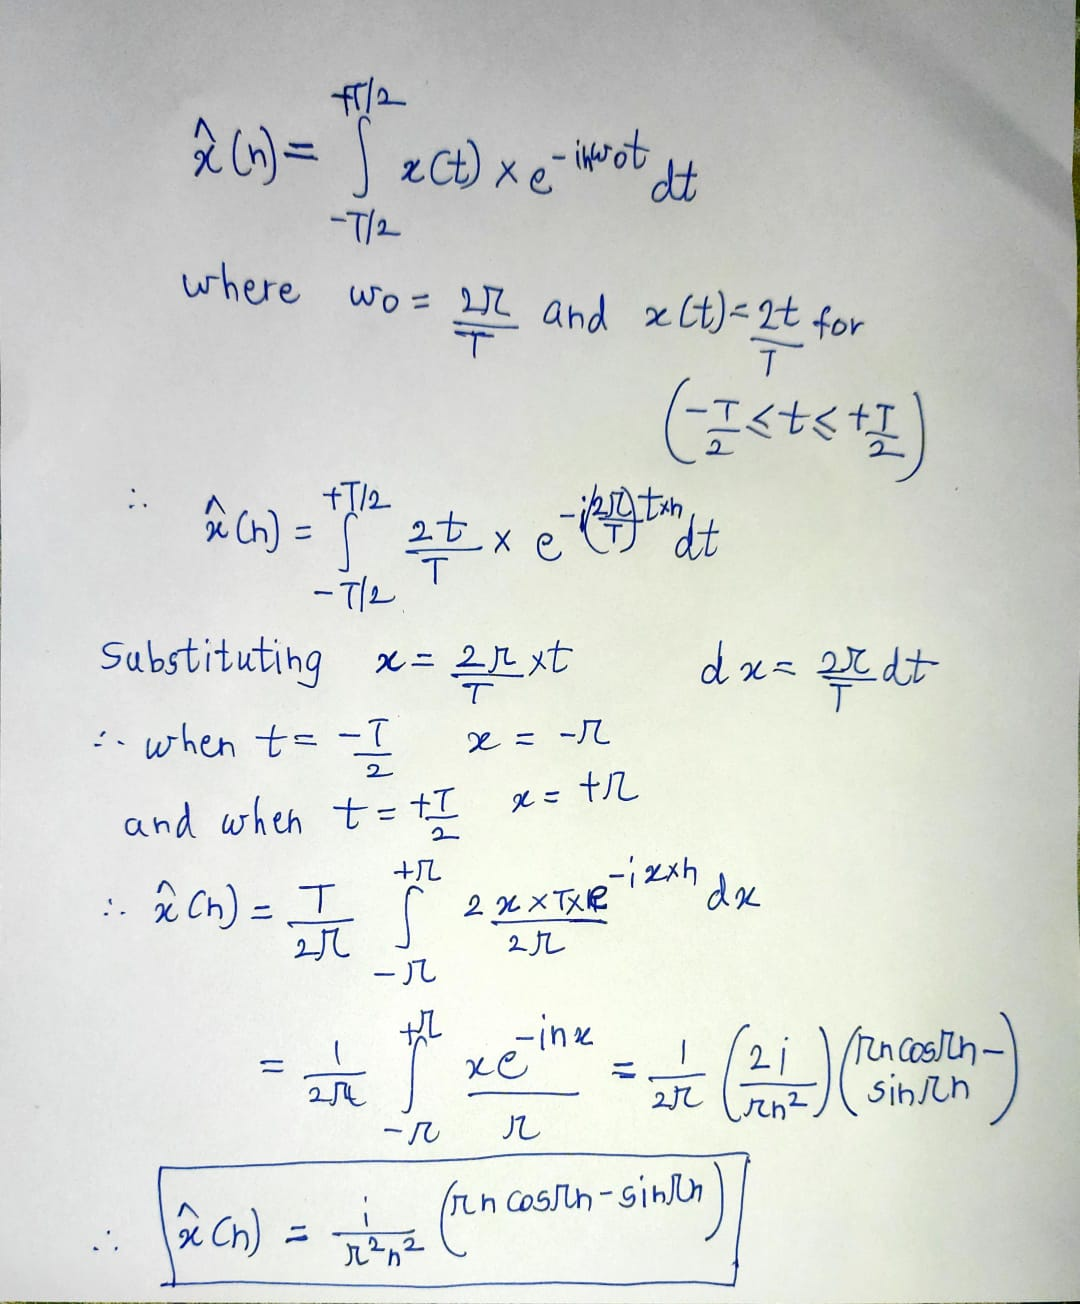<font color='blue'>Calculation of x<sup>^</sup>(n)-<br> The function calc_coeff has the following parameters-<pre>@parameters-
     @param N- The value of n
     Note-
     T, the time period is considered as 1.
     @brief- computes the value of x<sup>^</sup>(n)
     returns-
     x<sup>^</sup>(n)

In [ ]:
#This function generates the x^(n) Fourier coefficients
def calc_coeff(n):
  temp=np.pi*n
  return j*(temp*np.cos(temp)-np.sin(temp))/temp**2

<H1><font color='blue'>$~~~~~~~~~~~$Q1 Part b- Simulation of  the Fourier series for three time periods</H1>

<font color='blue'>Calculation of S<sub>N</sub>(t)-<br> The following code is written to calculate S<sub>N</sub>(t).<br>According to the formula we get real terms as well as complex terms. But as we are working in real space, we have to only consider the real part.

<font color='blue'> The function calc_sum takes the following inputs-<br>
     <pre>@parameters-
     @param N- The value of n
     @param T- The time period
     @param t- The input for the summation
     @brief- computes the Fourier series coefficients
     returns-
     The Fourier coefficient

In [ ]:
def calc_sum(N,T,t):
  '''@parameters-
     @param N- The value of n
     @param T- The time period
     @param t- The input for the summation
     @brief- computes the Fourier series coefficients
     returns-
     The Fourier coefficient
  '''
  sum=0
  w=np.pi*2/T
  for n in range (1,N+1):
#According to the formula we get real terms as well as complex terms. 
# But as we are working in real space, we have to only consider the real part. 
    sum+=calc_coeff(n)*np.exp(j*n*w*t)+calc_coeff(-n)*np.exp(j*w*(-n)*t)
  return np.real(sum)

<font color='blue'>The Fourier series is plotted for the values of n=3,5,10,20

<font color='blue'>The following function takes parameters-<br>
<pre><font color='blue'>
     @parameters-
     @param n- The value of n for which the Fourier Series is calculated
    
     @brief- computes and plots the Fourier Series coefficients
     returns-
     The Fourier series

In [ ]:
# A function (code) to plot the waveform for any value of n
def plot(n):
 y=np.array([calc_sum(n,1,t) for t in x])
 fig,ax=plt.subplots()
 ax.plot(x,y)
 ax.set_title("Fourier series for n="+str(n))
 ax.set_xlabel("Sample points(Time t)")
 ax.set_ylabel("Output (x(t))")
 return y

<H2><font color='blue'> For n=3 

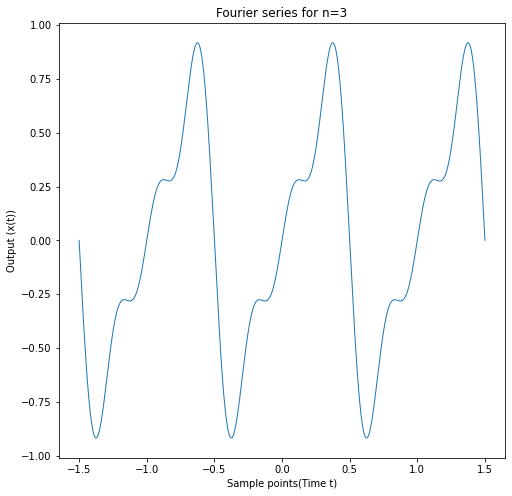

In [ ]:
fs3=plot(3)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Fig.2- Plot of Fourier Series for n=3

<H2><font color='blue'> For n=5

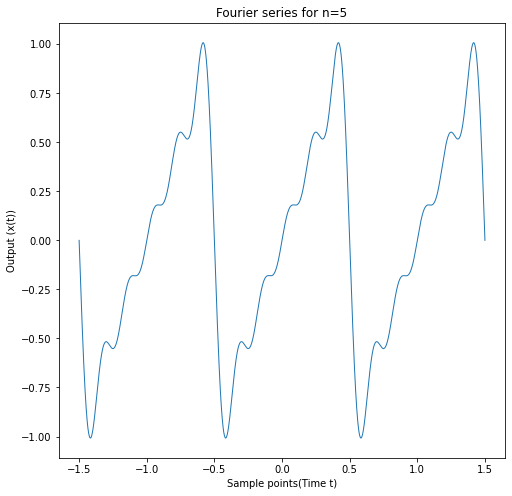

In [ ]:
fs5=plot(5)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Fig.3- Plot of Fourier Series for n=5

<H2><font color='blue'> For n=10

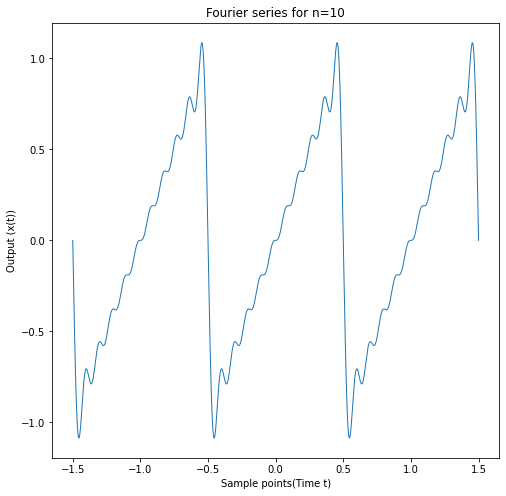

In [ ]:
fs10=plot(10)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Fig.4- Plot of Fourier Series for n=10

<H2><font color='blue'> For n=20 

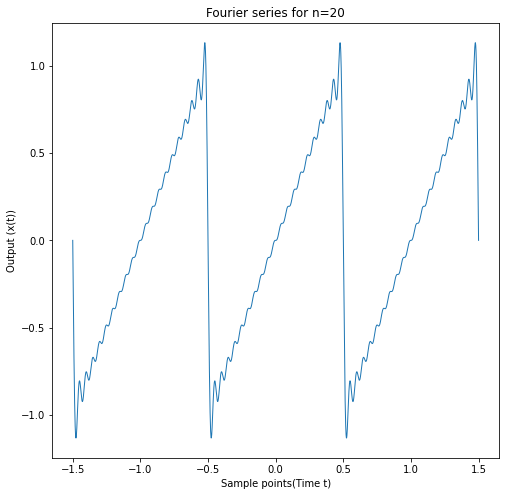

In [ ]:
fs20=plot(20)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Fig.5- Plot of Fourier Series for n=20

<font color='blue'> As can be concluded from the graphs, larger the value of n, better is the Fourier Series. 

<H1><font color='blue'>$~~~~~~~~~~~$Q1 Part c- Calculation of  the Fourier series for three time periods</H1>

<font color='blue'>The Error function is plotted for the values of n=3,5,10,20
<br> It is defined as E(t)=x(t)-S<sub>N</sub>(t)
<br> The Error function describes the accuracy of the Fourier series

<font color='blue'> The function error takes the following inputs-<br>
     <pre>@parameters-
     @param N- The value of n for which the error function is calculated
     @brief- computes and plots the error function for the given value of n
     returns-
     The error signal

In [ ]:
def error(n):
  y=np.subtract(create_signal(x,1),np.array([calc_sum(n,1,t) for t in x]))
  fig,ax=plt.subplots()
  ax.plot(x,y,marker='.')
  ax.set_title("Error function for n="+str(n))
  ax.set_xlabel("Sample points(Time t)")
  ax.set_ylabel("Error(t)")
  return y

<H2><font color='blue'> For n=3 

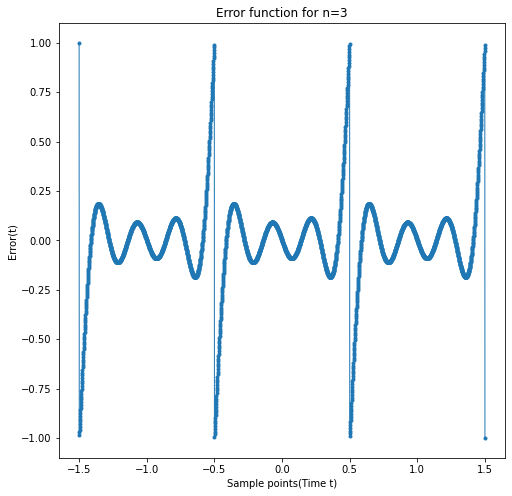

In [ ]:
e3=error(3)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Fig.6- Plot of Error function for n=3

<H2><font color='blue'> For n=5 

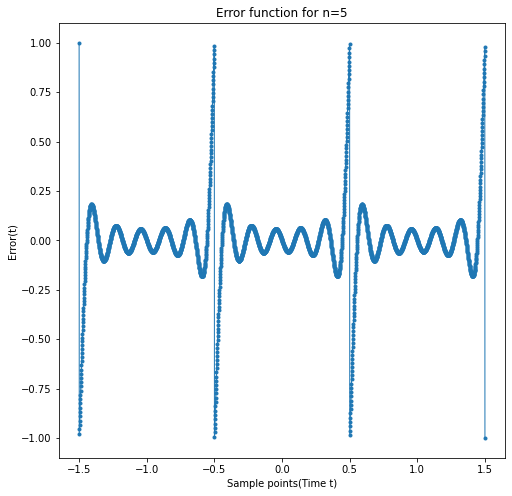

In [ ]:
e5=error(5)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Fig.7- Plot of Error function for n=5

<H2><font color='blue'> For n=10 

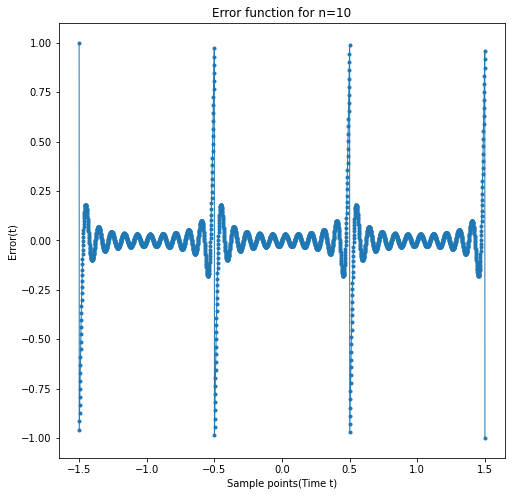

In [ ]:
e10=error(10)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Fig.8- Plot of Error function for n=10

<H2><font color='blue'> For n=20 

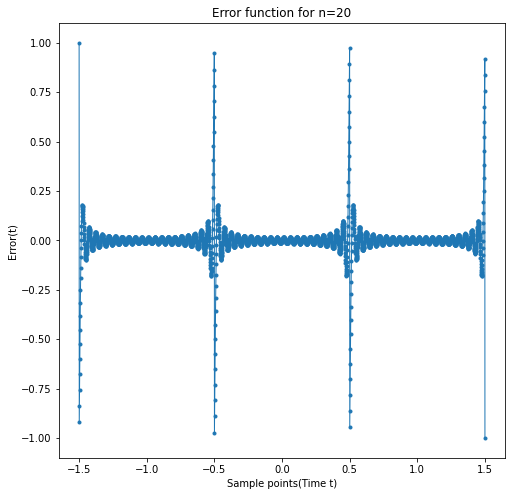

In [ ]:
e20=error(20)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Fig.9- Plot of Error function for n=20

<H1><font color='blue'>$~~~~~~~~~~~$Q1 Part e- Estimation of n to have a good representation of x(t)</H1>
<br> As discussed above, greater the value of n, better is the Fourier Series. The error function gives a measure of accuracy of the Fourier series. There can be many ways in which  a single valued error measurement can be obtained from the error signal. Some of them are-<br>
1. Using mean absolute error <br>
2. Using the norm of the error <br>
3. Using standard deviation of the error <br>
It is observed that the error measurements defined decrease with an increase in n. Hence the value of n is increased and the error measurement is taken.<br>
The choice of n depends on the error tolerance level. Even though the error decreases with an increase in n, the computation time required increase. So this tradeoff between speed and accuracy has to be considered.
<br> Here the square of standard deviation is considered for n=20,100,1000


Standrd deviation for n=20 -

In [ ]:
# The function np.std calculates the standard deviation
np.std(e20)**2

0.010216112083176701

<font color='blue'> Fourier series is also plotted along with the error for n=100 and n=1000. <br> As can be observed in the graphs below,The Gibbs phenomenon becomes more evident as n increases.

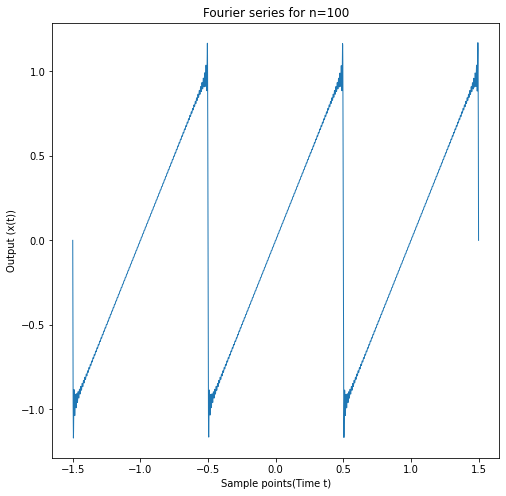

In [ ]:
fs100=plot(100)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Fig.10- Plot of Fourier series for n=100 

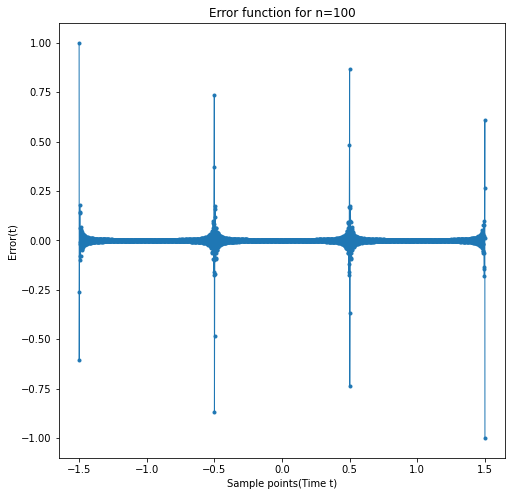

In [ ]:
e100=error(100)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Fig.11- Plot of Error function for n=100 

Standrd deviation for n=100 -

In [ ]:
np.std(e100)**2

0.002363884076539828

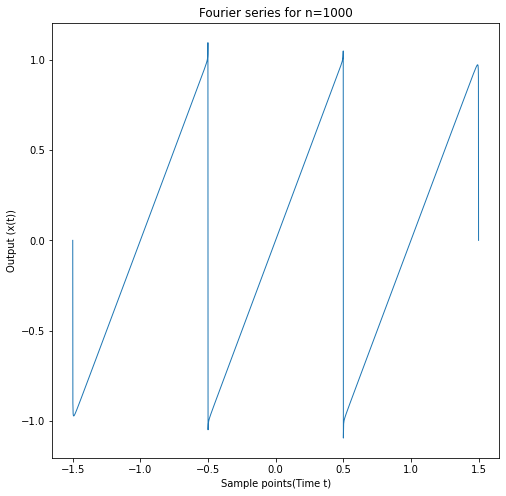

In [ ]:
fs1000=plot(1000)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Fig.12- Plot of Fourier series for n=1000 

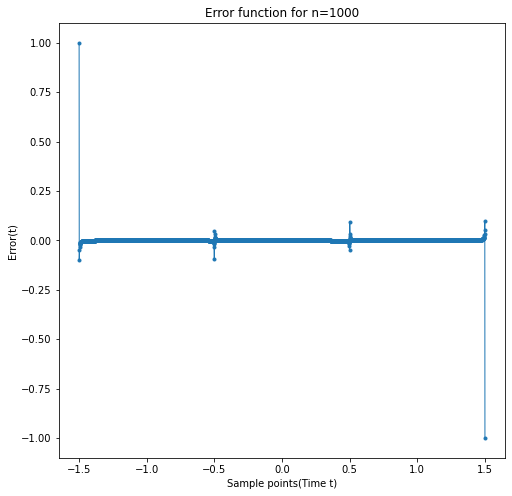

In [ ]:
e1000=error(1000)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Fig.13- Plot of Error function for n=1000 

Standrd deviation for n=1000 -

In [ ]:
np.std(e1000)**2

0.0006879445584806757

<font color='blue'> Thus the error decreases substancially for n=1000. So n=1000 can be used to plot a good Fourier series representation of x(t)

<font color='blue'><H1>Miscellaneous-<br></H1><H1> <font color='blue'>Calculation and plotting of Fejer sum.</H1><br> The Fejer kernel is plotted below. It can be seen that the issue Gibbs phenomenon has been addressed by the structure of kernel.

In [ ]:
def fejer_term(N,T,t):
  return np.sum([calc_sum(n,T,t) for n in range(N)])/N

In [ ]:
def fejer(N,T):
  y=np.array([fejer_term(N,T,t) for t in x])
  fig,ax=plt.subplots()
  fig.suptitle("Fejer Kernel")
  ax.set_title("Fejer sum for n="+str(N))
  ax.set_xlabel("Sample points(Time t)")
  ax.set_ylabel("Output (x(t))")
  ax.plot(x,np.real(y))
  return y

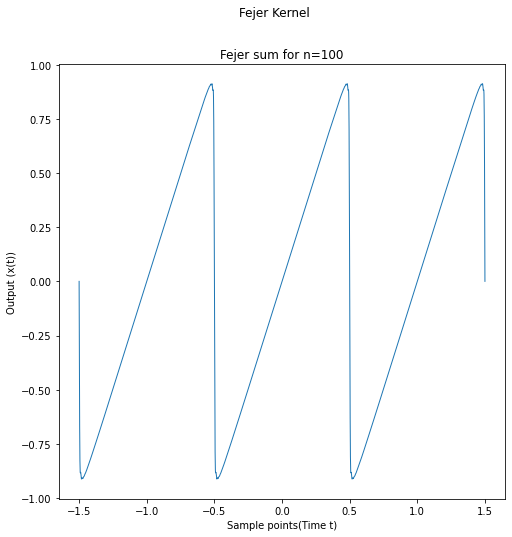

In [ ]:
f_y=fejer(100,1)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Fig.14- Plot of Fejer sum for n=100 

<H1><font color='blue'>$~~~~~~~~~~~$Q1 Part d- Calculation of power error percentage</H1>
The power error percentage is given by $$\frac{\\(||x(t)-S_N(t)||)_2^2}{\\(||x(t)||)^2}*100$$ 


<font color='blue'> The function power_error has the following parameters-<br>
     <pre>@parameters-
     @param N- The value of n for which the power error percentage is calculated
     @brief- computes  the power error percentage for the given value of n
     returns-
     The power error percentage

In [ ]:
def power_error(N):
  x=np.linspace(-1/2,1/2,1000)
  y=np.array([calc_sum(N,1,t) for t in x])
  e=np.subtract(create_signal(x,1),y)
  return (np.sum(np.multiply(e,e))/np.sum(np.multiply(y,y)))*100

<font color='blue'> The power error percentge is calculated and plotted for various values of n -

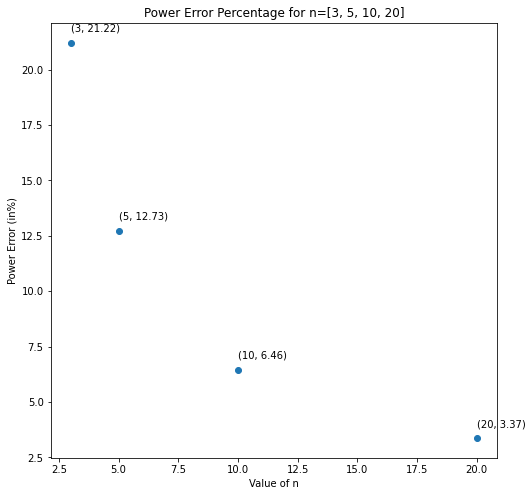

In [ ]:
# Plotting for the given values of n
N=[3,5,10,20]
l=[power_error(n) for n in N]
fig,ax=plt.subplots()
ax.set_title("Power Error Percentage for n="+str(N))
ax.set_xlabel("Value of n")
ax.set_ylabel(r"Power Error (in%)")
ax.scatter(N,l)
for i, j in zip(N,np.round(l,2)):
   plt.text(i, j+0.5, '({}, {})'.format(i, j))

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Fig.15- Plot of Power error percentage 

<font color='blue'> As can be concluded from the above graph, the value of power error percentage decreases as n increases.

<H1><font color='blue'>$~~~~~~~~~~~$Q2 Part a- Plotting Dirichlet kernel in 2D and 3D </H1>
The Dirichlet is given by- $$\frac{1}{2\pi}*\frac{\\sin(N+0.5)t}{\\sin(0.5t)}$$ 


<font color='blue'> The function dirichlet has the following parameters-<br>
     <pre>@parameters-
     @param t- The value of t for which the Dirchlet kernel needs to be calculated
     @param N- The value of N in D<sub>N</sub>(t)
     @brief- computes D<sub>N</sub>(t)
     returns-
     The value of D<sub>N</sub>(t)

In [ ]:
def dirichlet(t,N):
  if(np.sin(t/2)==0):
    return (2*N+1)/(2*np.pi)
  return (1/(2*np.pi))*np.sin((N+0.5)*t)/np.sin(t/2)

<font color='blue'> The Dirichlet kernel is plotted vs N for N= [4,10,50,100]

In [ ]:
def plot_dirichlet(N):
 x_d=np.linspace(0,2*np.pi+0.00001,1000)
 y=np.array([dirichlet(t,N) for t in x_d])
 fig,ax=plt.subplots()
 ax.set_title("Dirichlet kernel for N="+str(N))
 ax.set_xlim(0,2*np.pi)
 ax.set_xlabel("Sample points(Time)")
 ax.set_ylabel("D(n) value")
 ax.plot(x_d,y)

<font color='blue'><H2>N=4 :

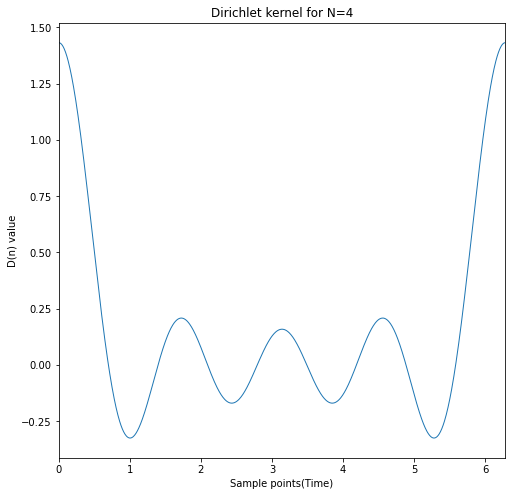

In [ ]:
plot_dirichlet(4)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Fig.16- Plot of D<sub>N</sub>(t) for N=4

<font color='blue'><H2>N=10 :

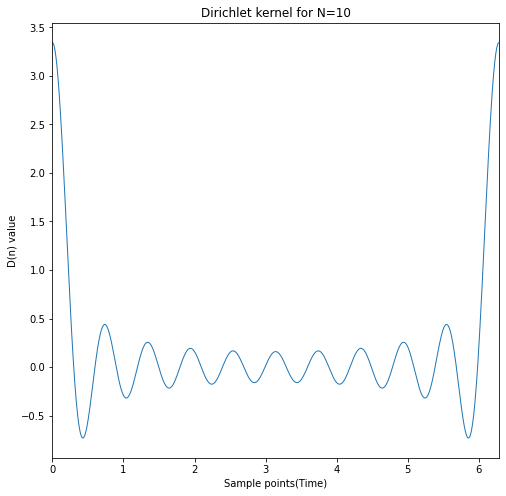

In [ ]:
plot_dirichlet(10)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Fig.17- Plot of D<sub>N</sub>(t) for N=10

<font color='blue'><H2>N=50 :

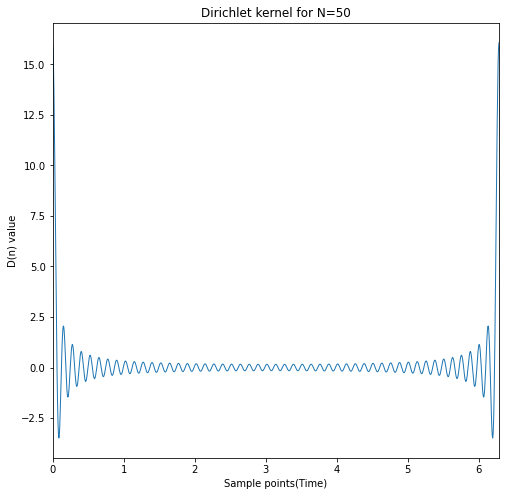

In [ ]:
plot_dirichlet(50)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Fig.18- Plot of D<sub>N</sub>(t) for N=50

<font color='blue'><H2>N=100 :

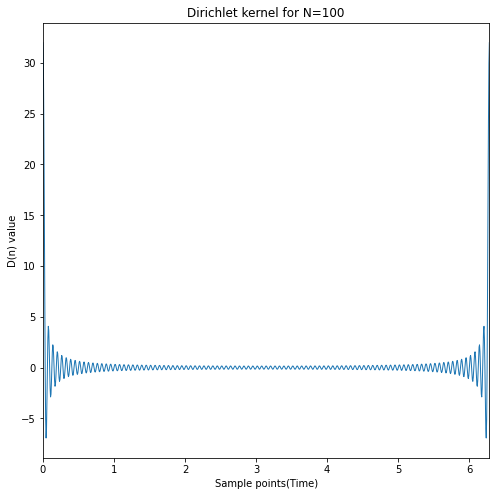

In [ ]:
plot_dirichlet(100)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Fig.19- Plot of D<sub>N</sub>(t) for N=100

<font color='blue'> The same Dirichlet kernels are plotted in a 3D graph.

In [ ]:
def plot_3D(N):
 t=np.linspace(0,2*np.pi,1000)
 x=np.cos(t)
 y=np.sin(t)
 z=np.array([dirichlet(k,N) for k in t])
 ax = plt.axes(projection='3d')
 ax.plot3D(x,y,z)
 ax.set_title("3d plot of Dirichlet Kernel for N="+str(N))
 ax.set_zlabel('Dn(t)')

<font color='blue'><H2>N=4 :

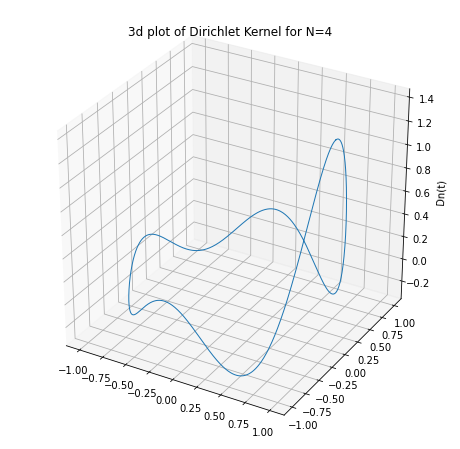

In [ ]:
plot_3D(4)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Fig.20- 3D-Plot of D<sub>N</sub>(t) for N=4

<font color='blue'><H2>N=10 :

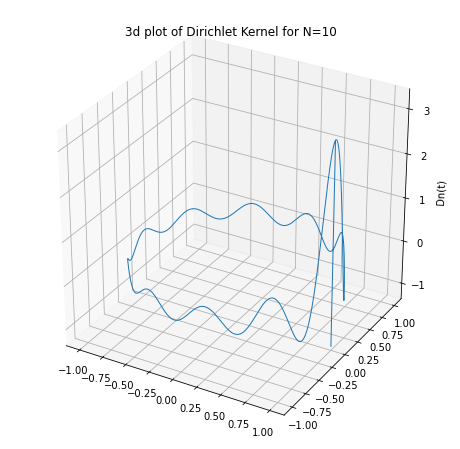

In [ ]:
plot_3D(10)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Fig.21- 3D-Plot of D<sub>N</sub>(t) for N=10

<font color='blue'><H2>N=50 :

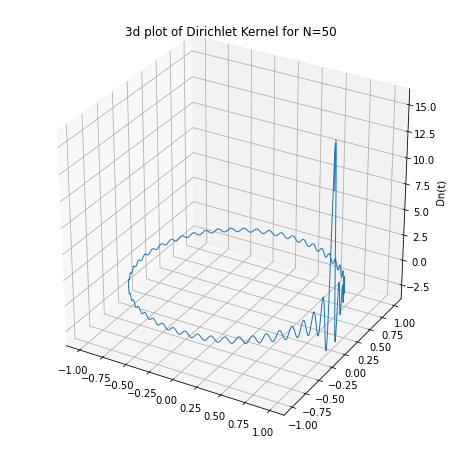

In [ ]:
plot_3D(50)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Fig.22- 3D-Plot of D<sub>N</sub>(t) for N=50

<font color='blue'><H2>N=100 :

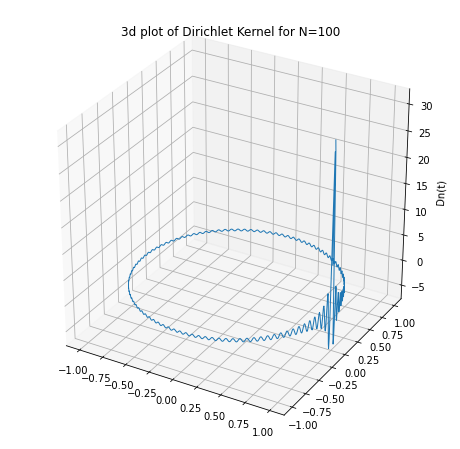

In [ ]:
plot_3D(100)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Fig.23- 3D-Plot of D<sub>N</sub>(t) for N=100

<H1><font color='blue'>$~~~~~~~~~~~$Q2 Part b and c- Integration of Dirichlet kernel </H1>
The integration is carried out using scipy.integrate module <br>
quad function is used to calculate the integral of D<sub>N</sub>(t) whereas the simps function is used to calculate the integral of |D<sub>N</sub>(t)|


<font color='blue'>The integrate function is used to integrate numerically D<sub>N</sub>(t). It takes input as the value of N and returns the value of the integral

In [99]:
def integrate(N):
  return integral.quad(dirichlet,0,2*np.pi,args=N,limit=100)[0]

<font color='blue'>The following funtions calculate the integral of |D<sub>N</sub>(t)|. The original Dirichlet function is modified to calculate |D<sub>N</sub>(t)|

In [121]:
def abs_dirichlet(t,N):
  if(np.sin(t/2)==0):
    return np.abs((2*N+1)/(2*np.pi))
  return np.abs((1/(2*np.pi))*np.sin((N+0.5)*t)/np.sin(t/2))

def abs_integrate(N):
  x_d=np.linspace(0,2*np.pi+0.00001,1000)
  d=np.array([abs_dirichlet(t,N) for t in x_d])
  return integral.simps(d,x_d)

<font color='blue'> The integral value sare now plotted for different values of n.

In [131]:
def plot_integral(N):
  N=np.array(N)
  l=np.array([integrate(n) for n in N])
  fig,ax=plt.subplots()
  ax.set_title("Integral of Dirichlet kernel for values of N="+str(N))
  ax.set_xlim(0,max(N))
  ax.set_ylim(0,1.5)
  ax.set_xlabel("Value of N")
  ax.set_ylabel("Value of integral")
  ax.plot(N,l)


In [132]:
def abs_plot_integral(N):
  N=np.array(N)
  l=np.array([abs_integrate(n) for n in N])
  fig,ax=plt.subplots()
  ax.set_title("Integral of Absolute value of Dirichlet kernel for values of N="+str(N))
  ax.set_xlim(0,max(N))
  ax.set_ylim(0,3.5)
  ax.set_xlabel("Value of N")
  ax.set_ylabel("Value of integral")
  ax.plot(N,l)

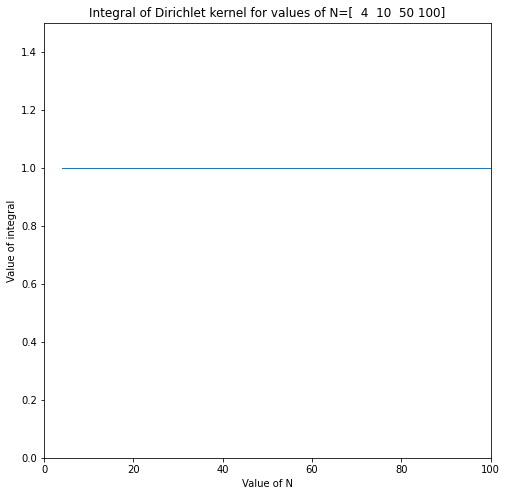

In [133]:
plot_integral([4,10,50,100])

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Fig.24- Plot of Integral of D<sub>N</sub>(t) for given values of N

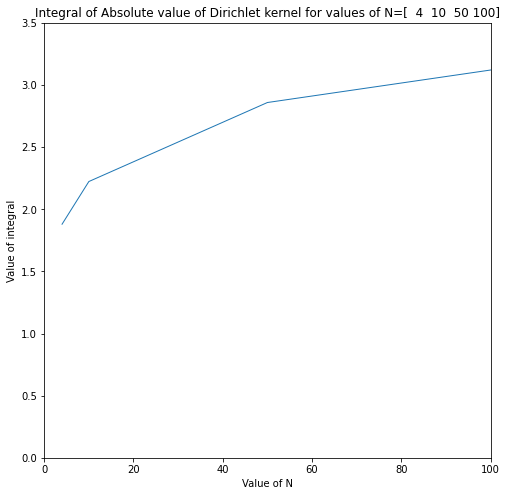

In [134]:
abs_plot_integral([4,10,50,100])

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Fig.25- Plot of Integral of |D<sub>N</sub>(t)| for given values of N

<font color='blue'>Here we can see that the integral of D<sub>N</sub>(t) is equal to 1 for all values of n. However the integral of |D<sub>N</sub>(t)| increases as n increases. So it's L1<sub>inf</sub> norm does not converge.